In [104]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [105]:
import matplotlib.pyplot as plt


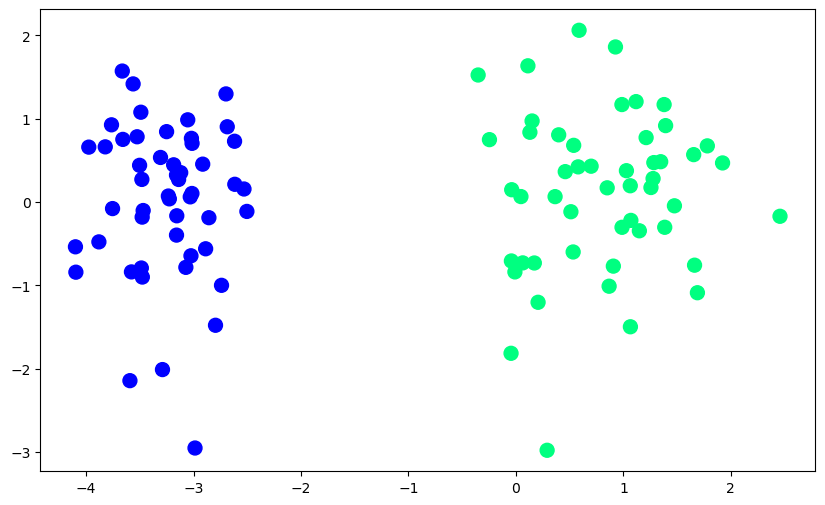

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [107]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(solver='sag')
lor.fit(x,y)

LogisticRegression(solver='sag')

In [108]:
print(lor.coef_)
print(lor.intercept_)

[[2.36777425 0.02176084]]
[3.13930288]


In [109]:
m1=-(lor.coef_[0][0])/(lor.coef_[0][1])
b1=-(lor.intercept_/lor.coef_[0][1])

In [110]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+ b1

In [123]:
def gd(x,y):
    
    x=np.insert(x,0,1,axis=1)
    weights=np.ones(x.shape[1])
    lr=0.5
    
    
    for i in range(2500):
        
        y_hat=sigmoid((np.dot(x,weights)))
        weights=weights + lr*(np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[0],weights[1:]

In [124]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [125]:
intercept_,coef_=gd(x,y)

In [126]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [127]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

(-3.0, 2.0)

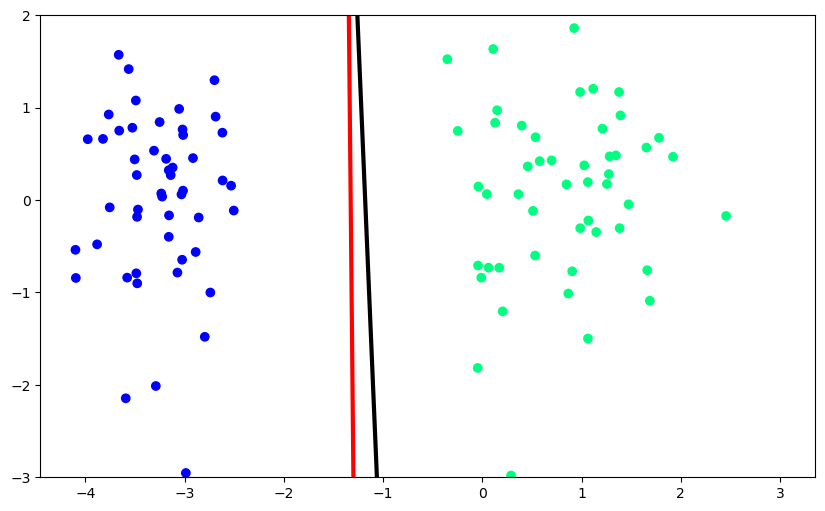

In [128]:
plt.figure(figsize=(10,6))

plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.ylim(-3,2)
